In [1]:
import os
import sys
sys.path.insert(0, os.path.relpath('../../../../..')) 



In [2]:

from recidiviz.calculator.modeling.population_projection.simulations.super_simulation.super_simulation_factory import SuperSimulationFactory
from recidiviz.calculator.modeling.population_projection.simulations.compartment_transitions import CompartmentTransitions
from recidiviz.calculator.modeling.population_projection.shell_compartment import ShellCompartment
from recidiviz.calculator.modeling.population_projection.spark_policy import SparkPolicy
import pandas as pd
from functools import partial
import yaml
%config Completer.use_jedi = False

In [12]:
test_sim = SuperSimulationFactory.build_super_simulation('../state/AZ/felony_reclassification/AZ_reclassification_model_inputs.yaml')
# test_sim.simulate_baseline(['prison', 'probation'])

/Users/pacopoler/.local/share/virtualenvs/pulse-data-Jd9N3JcA/lib/python3.7/site-packages/google/cloud/bigquery/table.py:1770: UserWarning: A progress bar was requested, but there was an error loading the tqdm library. Please install tqdm to use the progress bar functionality.
  create_bqstorage_client=create_bqstorage_client,


outflows_data returned 144 results
transitions_data returned 80 results
total_population_data returned 72 results


initialization time:  16.206968069076538
initialization time:  15.950825929641724
simulation_time:  15.878602027893066
simulation_time:  15.733474016189575


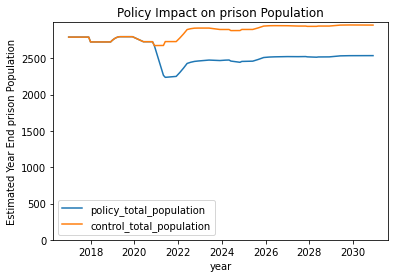

In [13]:
# Policy Option Methods
def divert_to_probation():
    return partial(ShellCompartment.reallocate_outflow, 
                   reallocation_fraction=0.9999999,
                   outflow='prison',
                   new_outflow='probation')

policy_list_non_retroactive = [
    SparkPolicy(policy_fn=divert_to_probation(),
                spark_compartment='pretrial',
                sub_population={'crime_type': 'non-violent'},
                apply_retroactive=False)
]
    
test_results = test_sim.simulate_policy(policy_list_non_retroactive, 'prison')


In [14]:
simulation_tag = 'AZ_resentencing'
test_sim.upload_simulation_results_to_bq(simulation_tag)

In [14]:
test_sim.data_dict['transitions_data'].groupby(['compartment', 'outflow_to']).sum()

compartment_duration  total_population
compartment      outflow_to                                              
prison_newcrime  release                           37.0          1.000000
prison_technical release                           15.0          1.000000
probation        prison_newcrime                  861.0          0.263205
                 prison_technical                 861.0          0.263205
                 release                           82.0          1.473590
release          release                         1920.0          2.000000

In [10]:
test_sim.pop_simulations['policy'].sub_simulations['NA'].simulation_compartments['probation'].transition_tables.transition_dfs

{'before': outflow_to            prison_newcrime  prison_technical   release  remaining
 compartment_duration                                                        
 1                            0.003210          0.003210  0.000000   0.993580
 2                            0.003231          0.003231  0.000000   0.993539
 3                            0.003252          0.003252  0.000000   0.993497
 4                            0.003273          0.003273  0.000000   0.993454
 5                            0.003294          0.003294  0.000000   0.993411
 6                            0.003316          0.003316  0.000000   0.993367
 7                            0.003338          0.003338  0.000000   0.993323
 8                            0.003361          0.003361  0.000000   0.993278
 9                            0.003384          0.003384  0.000000   0.993233
 10                           0.003407          0.003407  0.000000   0.993187
 11                           0.003430          0.0034

In [6]:
test_sim.output_data['life_years']

,jail,release,prison
year,,,
2016,0.0,0.000000,0.000000
2017,0.0,0.000000,0.000000
2018,0.0,0.000000,0.000000
2019,0.0,0.000000,0.000000
2020,0.0,0.000000,0.000000
2021,0.0,0.000000,0.000000
2022,0.0,-409.277499,409.277498
2023,0.0,-983.956718,983.956715
2024,0.0,-1687.532192,1687.532187


In [7]:
test_sim.output_data['cost_avoidance']

,jail,release,prison
year,,,
2016,0.0,0.0,0.000000e+00
2017,0.0,0.0,0.000000e+00
2018,0.0,0.0,0.000000e+00
2019,0.0,0.0,0.000000e+00
2020,0.0,0.0,0.000000e+00
2021,0.0,0.0,0.000000e+00
2022,0.0,-0.0,1.315663e+07
2023,0.0,-0.0,3.163027e+07
2024,0.0,-0.0,5.424741e+07
